# Жолковский Евгений

# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4: Линейные модели



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)
%pylab inline

from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
USER_NAME = u"Жолковский".lower()
REGULARIZATIONS = ["L1", "L2"]
ALGORITHM = ["", "Mini Batch"]

print "Имплементируйте обучение логистической регрессии с %s регуляризацией с помощью метода %s Stochastic Gradient Descent (SGD)"\
% (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    ALGORITHM[hash(USER_NAME[::-1]) % 2]
)

Имплементируйте обучение логистической регрессии с L2 регуляризацией с помощью метода Mini Batch Stochastic Gradient Descent (SGD)


## Вывод правила обновления весов (1 балл)

$$ \frac{\partial L}{\partial \theta} = \sum_{i=0}^m \left( y_i - \sigma \langle x_i \cdot \theta\rangle \right) \cdot x_i$$
Добавляем нулевой индекс для свободного члена

## Имплементация (5 баллов)

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
   

    def __init__(self, C=1, alpha=0.01, max_epoch=100, n_batches = 50):    
        
        self.C = float(C)
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.n_batches = n_batches 
        self.m = 1 #число объектов x
        self.n = 1 #число признаков
        self.teta = np.zeros(1) #вектор параметров
        self.Loss = []
        
    #функция потерь
    def J(self, X, y):
        J = 0
        for i in xrange(self.m):
            sigma_ = self.sigma(np.dot( X[i,:], self.teta))         
            J += -y[i] * np.log(sigma_) - (1-y[i]) * np.log(1 - sigma_)
        J /= self.m
        return J    
    

    def sigma(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        
        X = np.append(np.ones(X.shape[0]).reshape(-1,1) , X, axis=1)
        
        self.m = X.shape[0]
        self.n = X.shape[1]
        #self.teta = np.random.rand(self.n)
        self.teta = np.zeros(self.n) #teta - искомый вектор параметров
        for epoh in xrange(self.max_epoch):
            
            #делим выборку на случайные батчи
            ind = np.arange(self.m)
            np.random.shuffle(ind)
            batches = np.array_split(ind,self.n_batches)
        
            for batch in batches:
                X_batch = X[batch]
                y_batch = y[batch]
        
                S = 0
                for i in xrange(y_batch.shape[0]):
                    S += (y_batch[i] - self.sigma(np.dot(X_batch[i,:],self.teta)) ) * X_batch[i,:]

                self.teta += self.alpha  / (epoh+1) * (S + (self.teta) / self.C)
#             S = np.dot( X_batch.T, (y_batch - self.sigma(np.dot(X_batch, self.teta)) ).T )
#             self.teta += self.alpha  / (epoh+1) * (S + (self.teta) / self.C)

            self.Loss.append(self.J(X, y))
    
        return self
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
    
    def predict_proba(self, X):
        
        X = np.append(np.ones(X.shape[0]).reshape(-1,1) , X, axis=1)
        proba = self.sigma( np.dot(X,self.teta))
        return proba.reshape(-1,1)
        
    def predict(self, X):
        
        y_pred = np.zeros(X.shape[0])
        proba = self.predict_proba(X)

        for i in xrange(X.shape[0]):
            if proba[i] > 0.5:
                y_pred[i] = 1
            else:
                y_pred[i] = 0
            
        return y_pred
  

## Проверка на синтетических данных (2 балла)

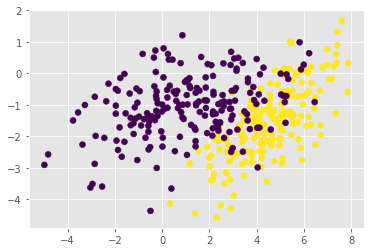

In [4]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [5]:
#контуры
xx, yy = np.meshgrid(np.arange(-6, 9, 0.1),
                     np.arange(-5, 2, 0.1))

xr = xx.ravel()
yr = yy.ravel()
xy = np.vstack((xr, yr)).T


### MySGDClassifier

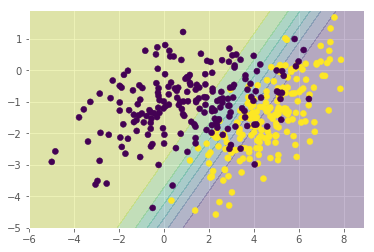

accuracy_score:  0.89


In [6]:
my_clf = MySGDClassifier(C=1, max_epoch=50, alpha=0.01, n_batches=50)
#my_clf = LogisticRegression(C=1)
my_clf.fit(X, y)
y_pred = my_clf.predict(X)

y_ = 1 - my_clf.predict_proba(xy)
y_ = y_.reshape(xx.shape)


plt.contourf(xx, yy, y_, alpha = 0.3)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
print 'accuracy_score: ', accuracy_score(y, y_pred)

### sklearn LogisticRegression

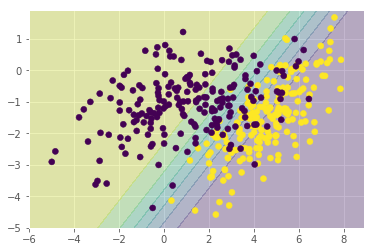

accuracy_score:  0.895


In [7]:
clf = LogisticRegression(C=1)
clf.fit(X, y)
y_pred = clf.predict(X)

y_ = 1 - clf.predict_proba(xy)[:,1]
y_ = y_.reshape(xx.shape)


plt.contourf(xx, yy, y_, alpha = 0.3)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
print 'accuracy_score: ', accuracy_score(y, y_pred)

## Анализ сходимости (2 балла)

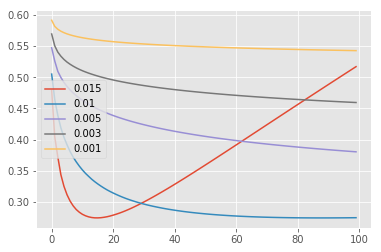

In [9]:
Alpha = [0.015, 0.01, 0.005, 0.003, 0.001]
for alpha in Alpha:

    my_clf = MySGDClassifier(C=1, max_epoch=100, alpha=alpha, n_batches=50)
    my_clf.fit(X, y)
    Loss = my_clf.Loss
    plt.plot(range(len(Loss)), Loss)
    plt.legend(Alpha)
